In [93]:
#그래프 파일과 단어의 출현 횟수가 저장된 파일 불러오기 (해당 부분은 단어 각각의 출현 횟수임) 동시 출현하는 빈도는 G의 edge weight로 저장됨
import networkx as nx
import csv
platform="rob" #zep or rob
data="origin" #origin, hate, like, medium
path="/content/drive/MyDrive/성균관대/그래프 시각화/" #해당 그래프 및 단어 빈도가 저장된 파일이 있는 위치 경로
G = nx.read_graphml(path+platform+"/"+platform+"_"+data+'_graph.graphml')
with open(path+platform+"/"+platform+"_"+data+'_word_count.csv') as csv_file:
    reader = csv.reader(csv_file)
    mydict = dict(reader)

In [ ]:
for key in mydict:
  mydict[key]=int(mydict[key])

In [ ]:
print(mydict)

{'game': 170588, 'play': 45482, 'fun': 23323, 'people': 13197, 'fix': 12878, 'please': 12792, 'friend': 12477, 'thing': 12258, 'time': 11933, 'star': 11739, 'problem': 11642, 'robux': 11305, 'love': 10990, 'lot': 10745, 'bug': 8528, 'get': 8075, 'account': 7962, 'work': 7822, 'phone': 7244, 'lag': 6969, 'pls': 6870, 'year': 6530, 'day': 6524, 'try': 6251, 'glitch': 6009, 'screen': 5971, 'money': 4922, 'player': 4542, 'download': 4514, 'reason': 4324, 'ban': 4260, 'join': 4100, 'hacker': 4064, 'something': 3981, 'kid': 3957, 'hate': 3947, 'amaze': 3892, 'change': 3886, 'use': 3801, 'way': 3727, 'thank': 3645, 'experience': 3587, 'log': 3514, 'freeze': 3409, 'camera': 3372, 'alot': 3371, 'rate': 3312, 'stuff': 3238, 'move': 3163, 'everything': 3052, 'guy': 3015, 'avatar': 3014, 'dont': 3007, 'anything': 2956, 'issue': 2896, 'world': 2731, 'help': 2719, 'load': 2700, 'password': 2692, 'let': 2595, 'crash': 2458, 'everyone': 2428, 'nothing': 2421, 'life': 2415, 'word': 2325, 'name': 2290, 

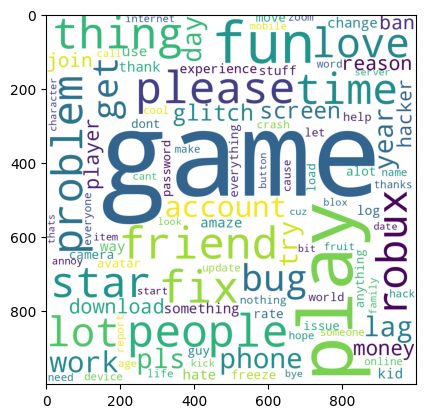

In [ ]:
#wordcloud c_dict=단어들의 출현 빈도
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(mydict)
plt.imshow(wc)

In [ ]:
import itertools
small_network = G.copy()
not_remove=dict(itertools.islice(mydict.items(), 200)) #제거하지 않을 집합
nodes_to_remove = set(G.nodes()) - set(not_remove)
small_network.remove_nodes_from(nodes_to_remove)
nx.write_graphml_lxml(small_network, "./small_"+platform+"_"+data+"_graph.graphml")

#gephi에서 시각화 (해당 부분은 예쁘게 해석이 가능한 정도로 만들면 됨)
- Appearance
  - 기준 노드: 크기/색상/라벨크기 weight(출현횟수)
  - 기준 엣지: weight (동시출현횟수)
- Layout
  - ForceAltas2, prevent overlap
  - 이후, Label Adjust(라벨 안겹치게 해주는 것인듯)
-Filter Query
  - Edge weight를 기준으로 필터링(적당하게 보이는 정도로)

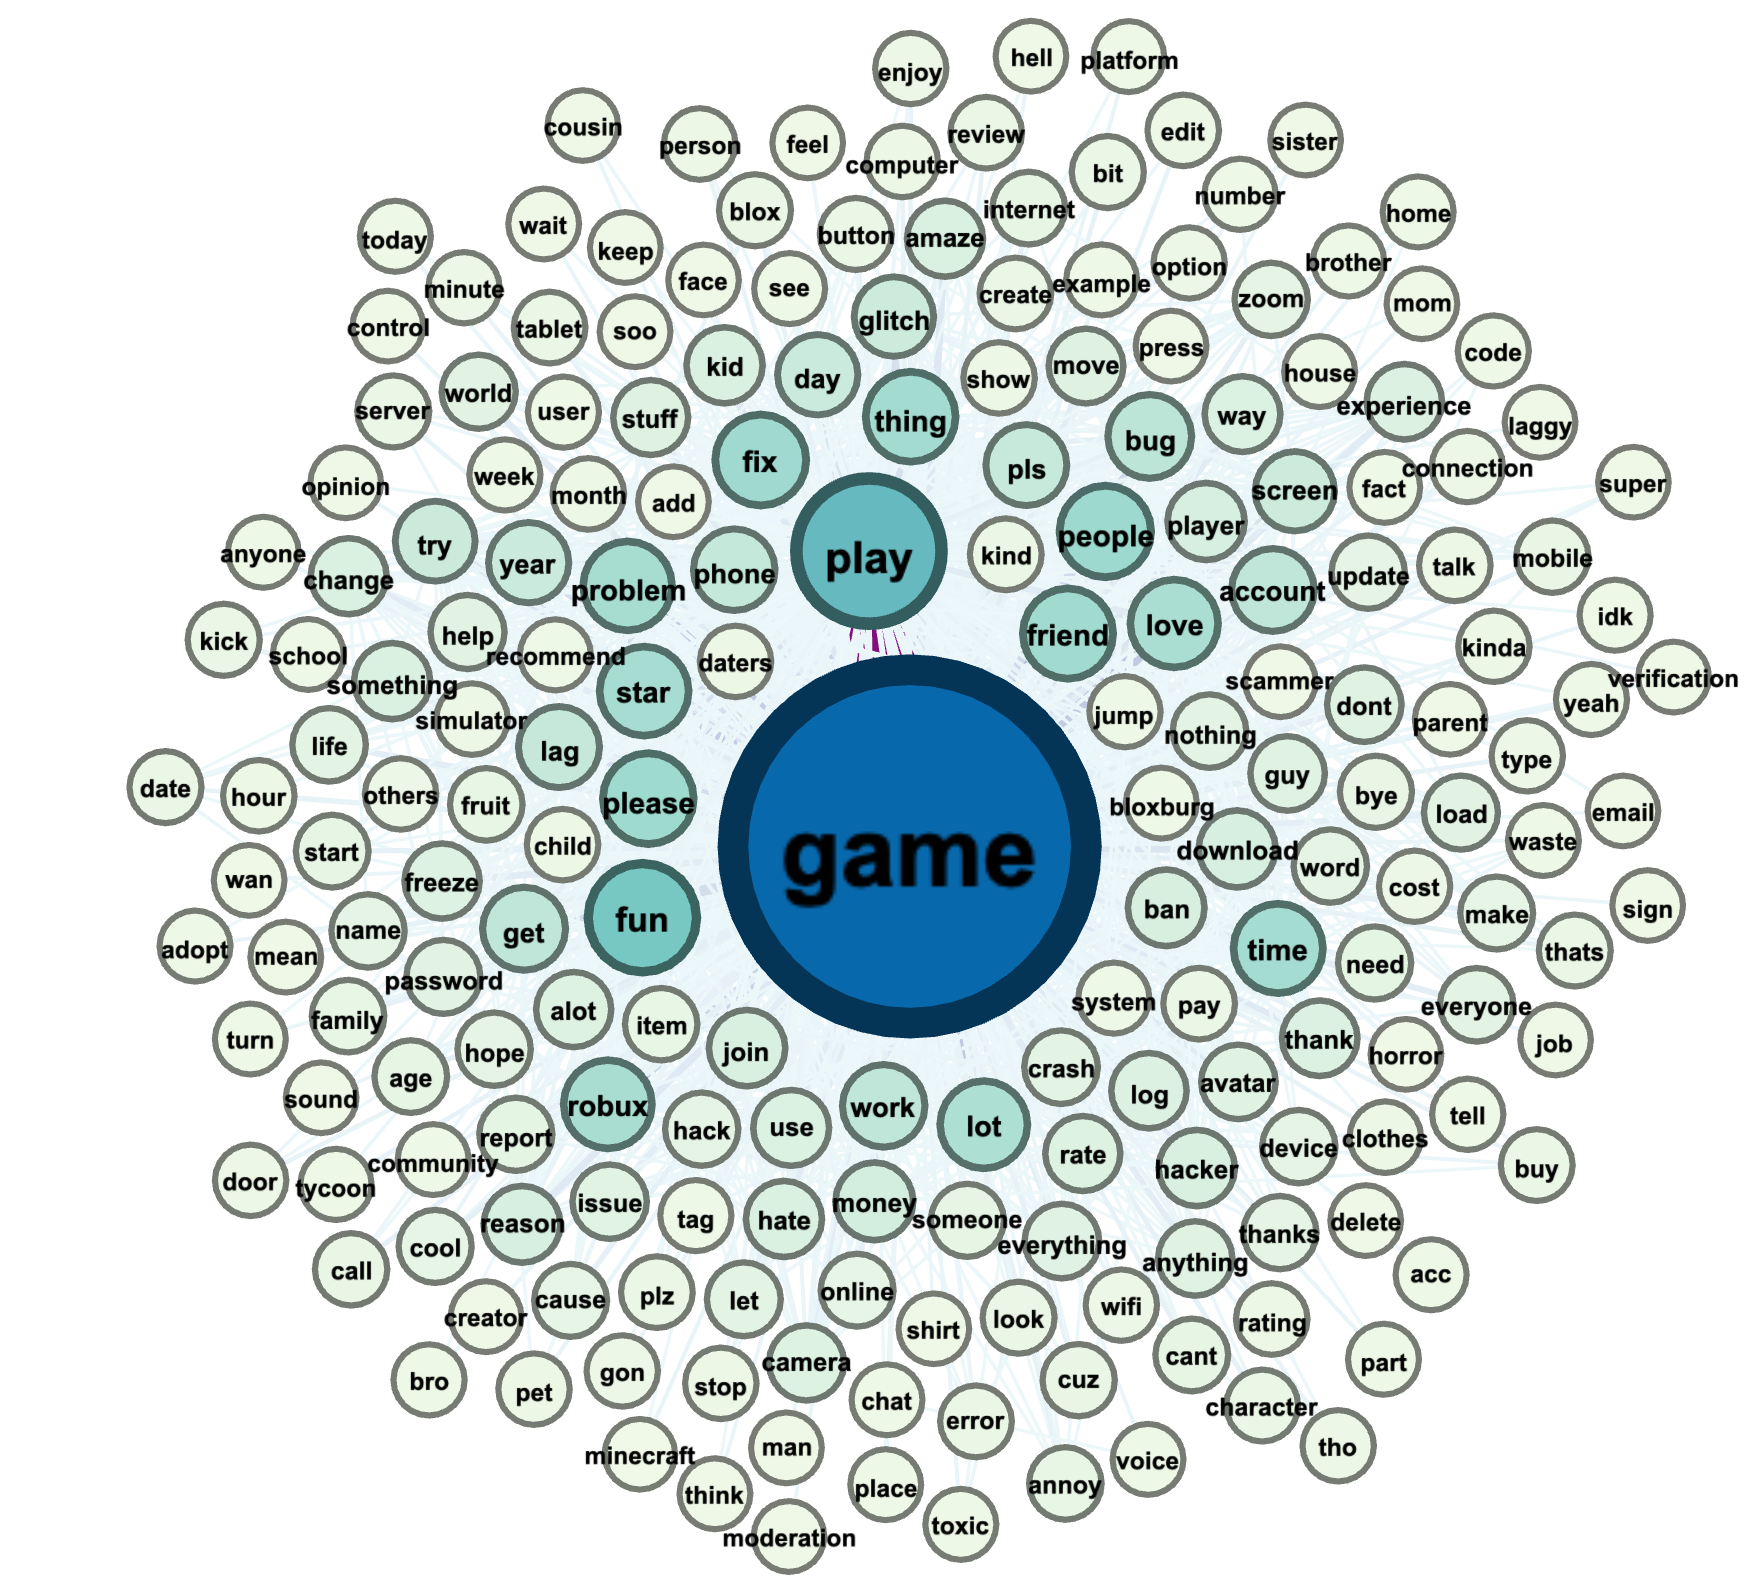

#주요 단어들을 기준으로 ego network 그리기
- 재화거래 수단인 robux, zem
- avatar
- error
- game, map
등등을 기준으로 하면 될 듯함.

(-0.05905927458778024,
 0.0875894066132605,
 -0.06294727766886353,
 0.17962881991639734)

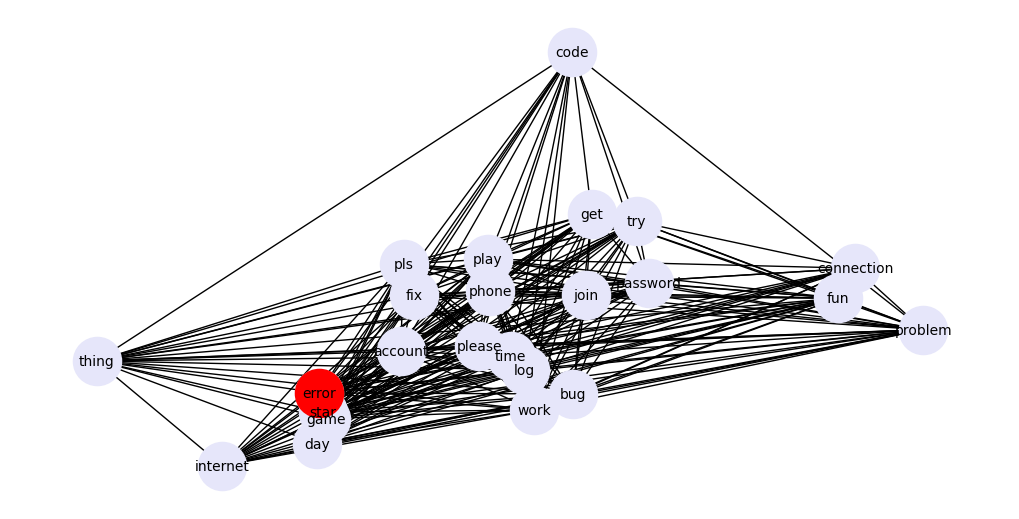

In [ ]:
#ego network 그리기
import matplotlib.pyplot as plt
ego = 'error'

def drop_low_weighted_edge(inputG, above_weight=3): #above_weight는 threshold 값이 됨. weight가 above_weight 이상 넘는 것만 남김.
    rG = nx.Graph()
    rG.add_nodes_from(inputG.nodes(data=True))
    edges = filter(lambda e: True if e[2]['weight']>=above_weight else False, inputG.edges(data=True))
    rG.add_edges_from(edges)
    """
    neighbor가 없는 isolated node를 모두 지운다. 
    """
    for n in inputG.nodes():
        if len(list(nx.all_neighbors(rG, n)))==0:
            rG.remove_node(n)
        #print(n, list(nx.all_neighbors(rG, n)))
    return rG
    

G1 = drop_low_weighted_edge(G, 100)

G_ego = nx.ego_graph(G1, ego)
plt.figure(figsize=(10,5))
pos = nx.spring_layout(G)
nx.draw(G_ego, pos, node_color = "lavender", 
        node_size = 1200, with_labels = True, font_size=10)
  
options = {"node_size": 1200, "node_color": "r"}
nx.draw_networkx_nodes(G_ego, pos, nodelist=[ego], **options)
plt.axis('off')

In [ ]:
#전체 노드 중 상위 값들 시각화
'''
import itertools
small_network = G.copy()
not_remove=dict(itertools.islice(mydict.items(), 200)) #제거하지 않을 집합
nodes_to_remove = set(G.nodes()) - set(not_remove)
small_network.remove_nodes_from(nodes_to_remove)
edges = small_network.edges()
weights = [int(small_network[u][v]['weight']/1000) for u,v in edges]
best = nx.pagerank(small_network, weight='weight')
node_size=[70000*v for v in best.values()]
plt.figure(figsize=(15,15))
pos = nx.spring_layout(small_network)
nx.draw(small_network, pos, node_color = "lavender", 
        with_labels = True, font_size=10, node_size=7000)
'''